<a href="https://colab.research.google.com/github/sanjeevtrivedi/pgd-dsai/blob/main/Lecture_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

In this notebook, we'll explore logistic regression on iris dataset and wine dataset

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd

In [ ]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

## EDA (Exploratory Data Analysis) on iris dataset

We'll explore on the classic Iris dataset.


### Iris Dataset

In [ ]:
# Importing models and datasets from sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
# Load the Iris dataset into a DataFrame for EDA
iris = load_iris()

iris
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

print("DataFrame shape:", df_iris.shape)

DataFrame shape: (150, 5)


In [ ]:
# Display the first 5 rows of the DataFrame
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Display the data types of the columns and count of non-null values
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Display the summary statistics of the DataFrame
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Fill missing values with the mean of the column
df_iris.fillna(df_iris.mean(), inplace=True)
df_iris.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


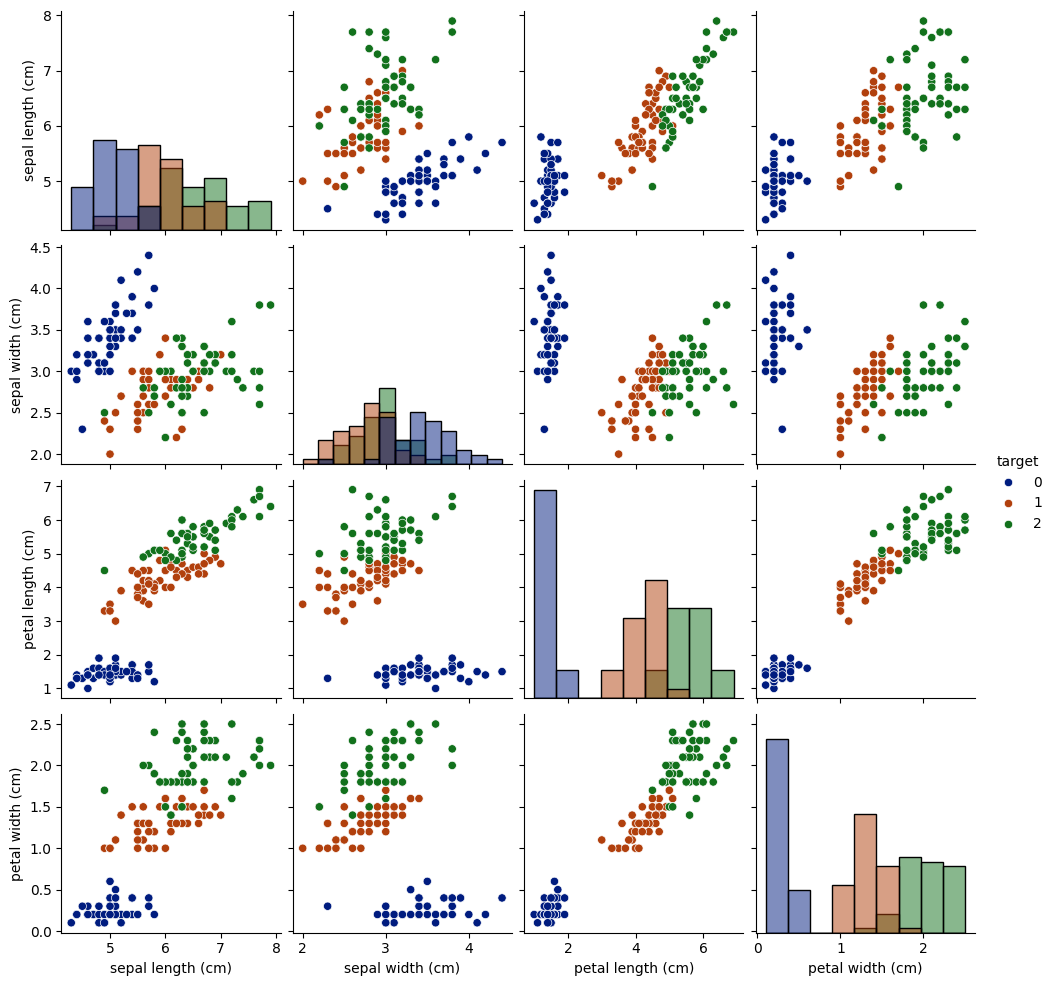

In [ ]:
# Pairplot to see pairwise relationships
sns.pairplot(df_iris, hue='target', diag_kind='hist', palette='dark')
plt.show()

<ipython-input-22-59540885e7b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_iris,palette='dark')


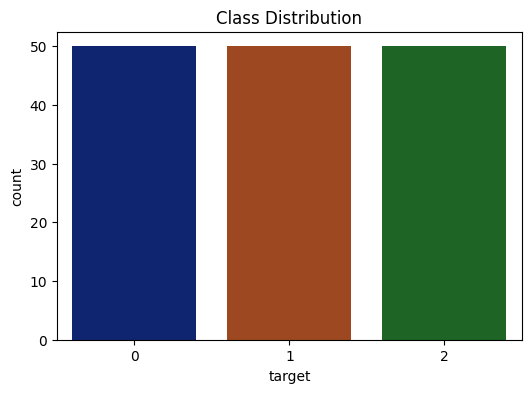

In [ ]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_iris,palette='dark')
plt.title('Class Distribution')
plt.show()

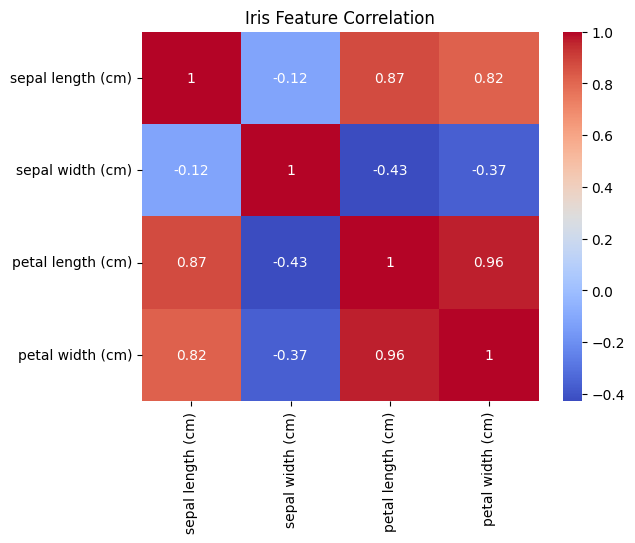

In [ ]:
# Correlation heatmap
corr = df_iris.drop('target', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Iris Feature Correlation')
plt.show()

## Logistic regression on iris dataset

In [ ]:
# Prepare data for scikit-learn
X = df_iris.drop('target', axis=1)
y = df_iris['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# # Standardize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Using min-max scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression classifier
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)



# 1/(1+e^{-(w.x+b)})
# 1/(1+e^{-NNOutput(x)})


LogisticRegression(max_iter=200)

In [ ]:
# Predict
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy (Iris):", accuracy)

Classification Accuracy (Iris): 1.0


In [ ]:
y_pred, y_test



(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 73     1
 18     0
 118    2
 78     1
 76     1
 31     0
 64     1
 141    2
 68     1
 82     1
 110    2
 12     0
 36     0
 9      0
 19     0
 56     1
 104    2
 69     1
 55     1
 132    2
 29     0
 127    2
 26     0
 128    2
 131    2
 145    2
 108    2
 143    2
 45     0
 30     0
 Name: target, dtype: int64)

## Visualize the decision boundary
Note: this is only for visualization purposes the model is not perfectly fit using hyperparameters selection and standardization practices

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_boundaries(X, y, model, feature_pairs, title,feature_names):
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

    plt.figure(figsize=(15, 10))
    for i, (x_idx, y_idx) in enumerate(feature_pairs):
        plt.subplot(2, 3, i + 1)

        X_pair = X.iloc[:, [x_idx, y_idx]].values
        model.fit(X_pair, y)

        x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
        y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

        plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y, cmap=ListedColormap(cmap_bold),
                    edgecolor='k', s=20)
        plt.xlabel(X.columns[x_idx])
        plt.ylabel(X.columns[y_idx])
        plt.title(f'Feature {feature_names[x_idx]} vs {feature_names[y_idx]}')

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Classification Accuracy (Binary Iris): 1.0


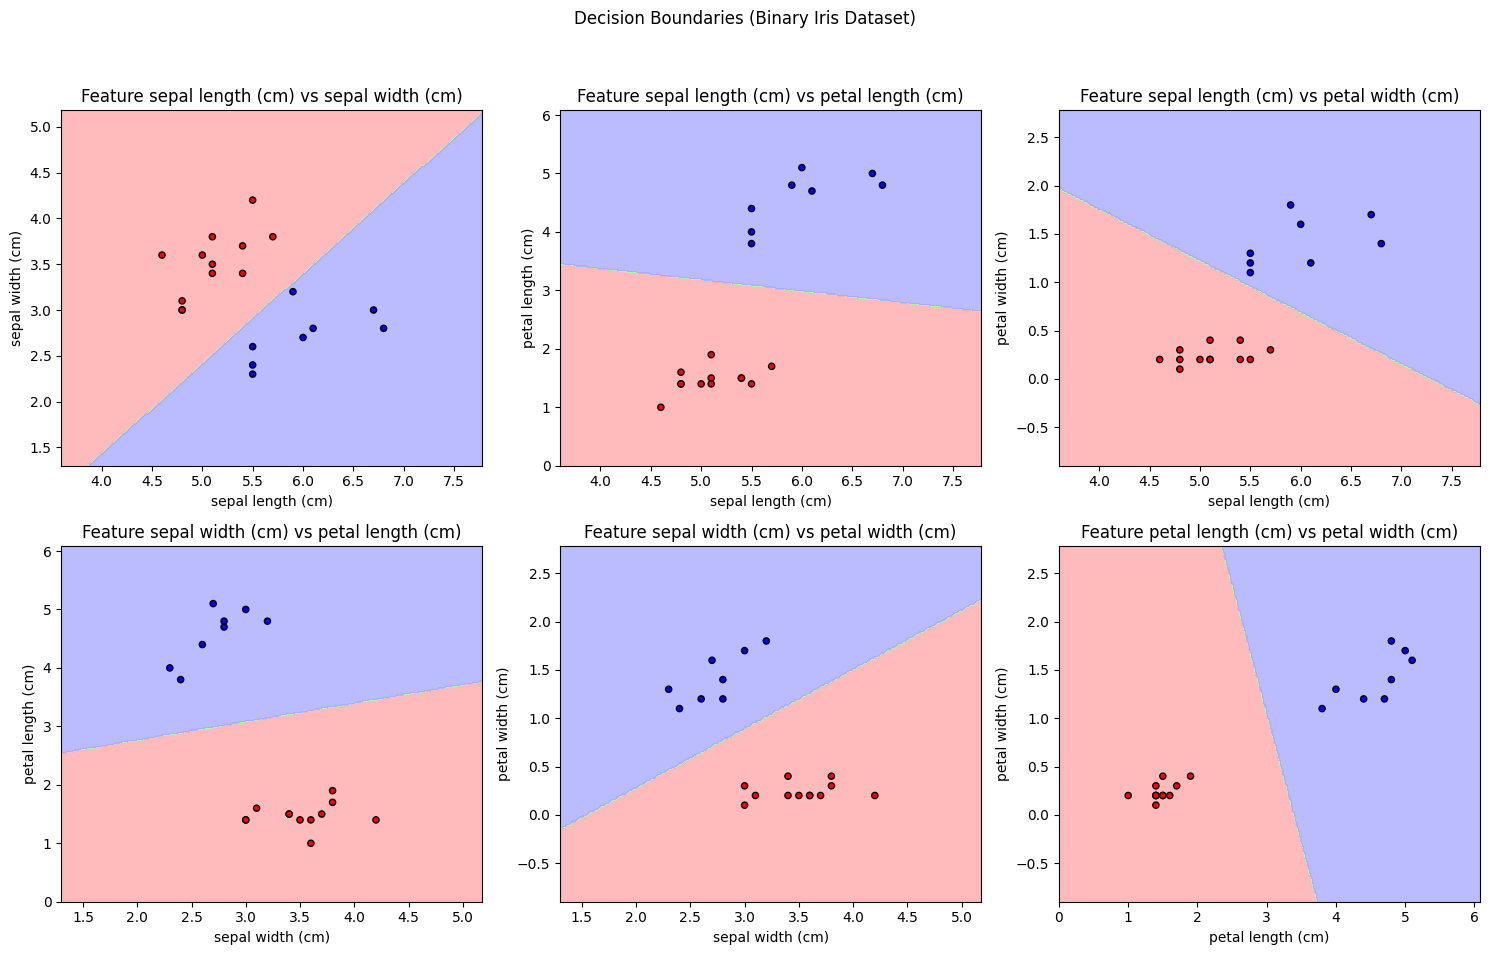

In [ ]:
# Change the target to binary classification (0 and 1)
df_iris_binary = df_iris[df_iris['target'] != 2]
X_binary = df_iris_binary.drop('target', axis=1)
y_binary = df_iris_binary['target']

# Get all names of features
feature_names = X_binary.columns
feature_pairs = [(i, j) for i in range(len(feature_names)) for j in range(i+1, len(feature_names))]
# Train/test split for binary classification
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train the model on the binary classification data
clf_bin = LogisticRegression(max_iter=200)
clf_bin.fit(X_train_bin, y_train_bin)

# Predict on the test set
y_pred_bin = clf_bin.predict(X_test_bin)

# Evaluate accuracy
accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
print("Classification Accuracy (Binary Iris):", accuracy_bin)

# Plot decision boundaries for binary classification
plot_decision_boundaries(X_test_bin, y_test_bin, clf_bin, feature_pairs, 'Decision Boundaries (Binary Iris Dataset)', feature_names)

## Confusion Matrix

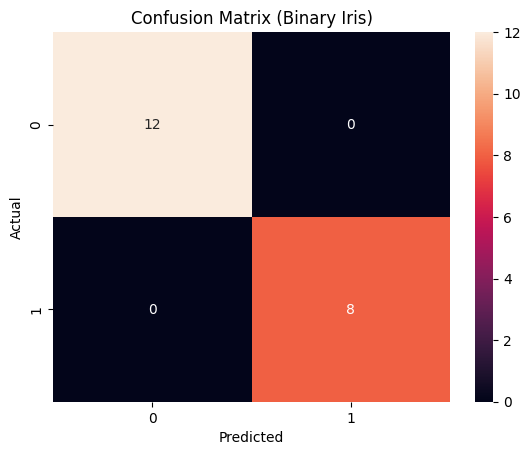

In [ ]:
# Create a confusion matrix using seaborn
from seaborn import heatmap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_bin = confusion_matrix(y_test_bin, y_pred_bin)

# Create a confusion matrix
heatmap(cm_bin, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Binary Iris)')
plt.show()


## EDA Wine Dataset

In [ ]:
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

# Load the Wine dataset
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

In [ ]:
print("DataFrame shape:", df_wine.shape)
df_wine.head()
df_wine.info()
df_wine.describe()

DataFrame shape: (178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# Remove duplicates from the DataFrame
df_wine.drop_duplicates(inplace=True)


# Fill missing values with the mean of the column
df_wine.fillna(df_iris.mean(), inplace=True)
df_wine.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


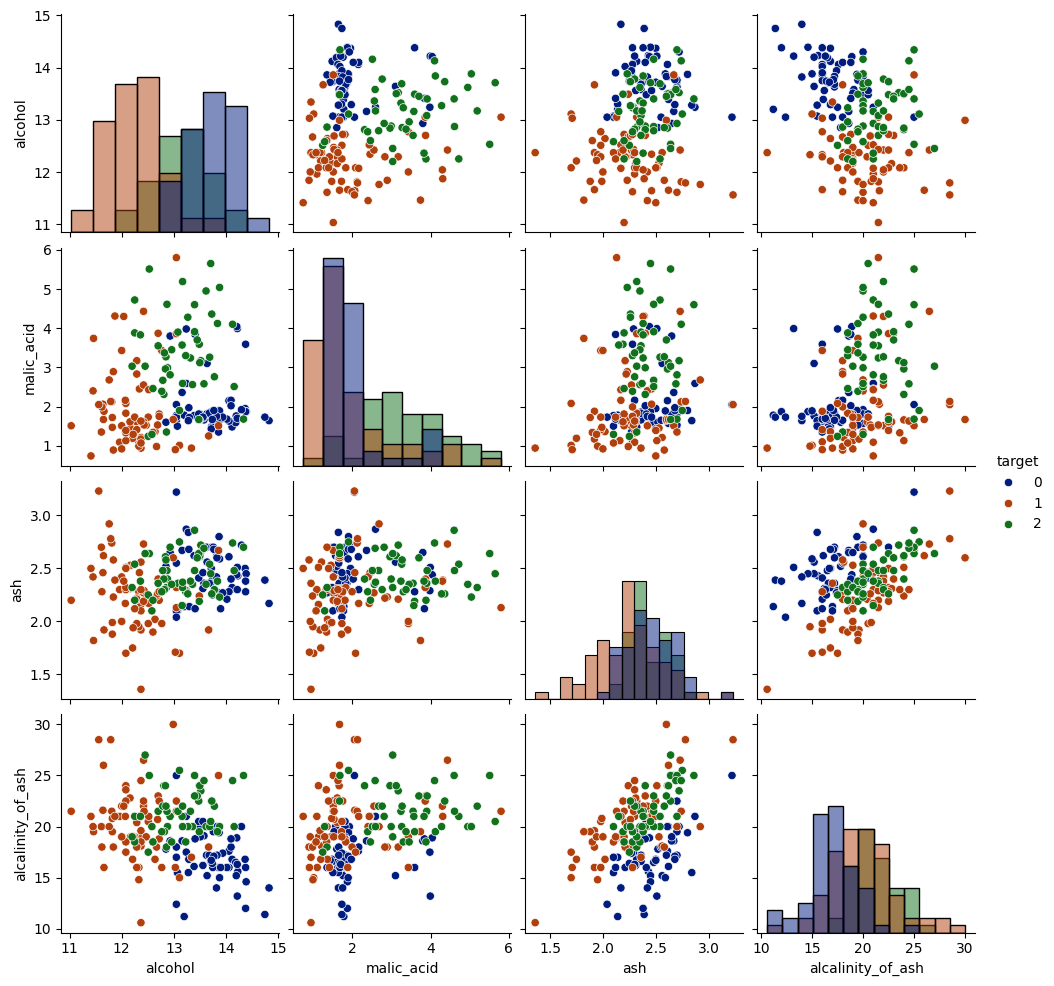

In [ ]:
# EDA for Wine Dataset
# Pairplot
sns.pairplot(df_wine, hue='target', vars=wine.feature_names[:4], diag_kind='hist',palette='dark') # plotting only first 4 features
plt.show()

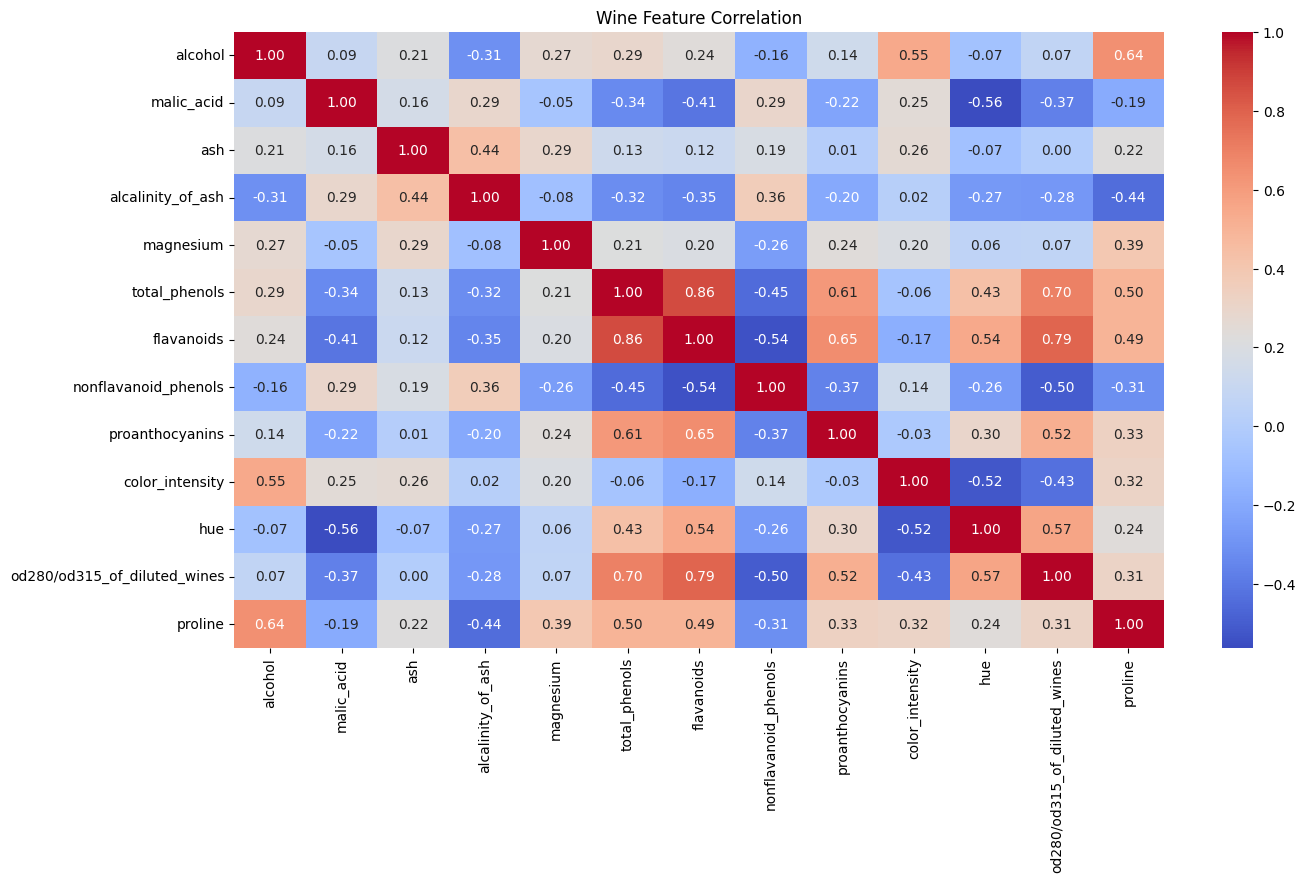

In [ ]:
# Correlation Heatmap
corr = df_wine.drop('target', axis=1).corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Wine Feature Correlation')
plt.show()

<ipython-input-25-c8c52150e3bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_wine,palette='dark')


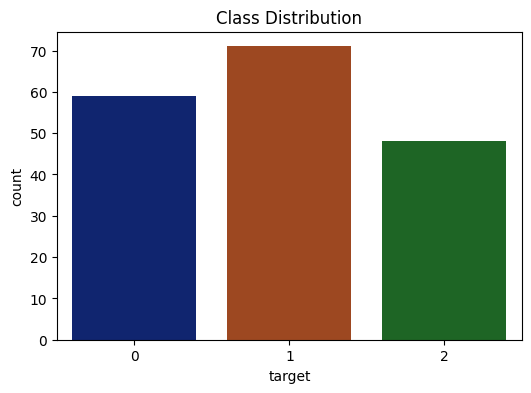

In [ ]:

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_wine,palette='dark')
plt.title('Class Distribution')
plt.show()



## Logistic regression on wine dataset

In [ ]:

# Prepare data for classification
X = df_wine.drop('target', axis=1)
y = df_wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Min-Max Scaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Change the np.ndarray to DataFrame
# X_train = pd.DataFrame(X_train, columns=wine.feature_names)
# X_test = pd.DataFrame(X_test, columns=wine.feature_names)

In [ ]:
# Train a Logistic Regression model
clf_wine = LogisticRegression(max_iter=1000) # Increased max_iter for potential convergence issues
clf_wine.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_wine = clf_wine.predict(X_test)

# Evaluate the model
accuracy_wine = accuracy_score(y_test, y_pred_wine)
print(f"Accuracy (Wine Dataset): {accuracy_wine}")

# Classification Report
print(classification_report(y_test, y_pred_wine))

Accuracy (Wine Dataset): 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



## Visualize the decision boundary
Note: this is only for visualization purposes the model is not perfectly fit using hyperparameters selection and standardization practices

In [ ]:
from matplotlib.colors import ListedColormap
import itertools
# Adjust the number of subplots to fit 13 features
n_features = 13
n_cols = 3
n_rows = (n_features * (n_features - 1)) // (2 * n_cols)
def plot_decision_boundaries(X, y, model, feature_pairs, title,feature_names):
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

    plt.figure(figsize=(15, 10))
    for i, (x_idx, y_idx) in enumerate(feature_pairs):
        plt.subplot(2, 3, i + 1)

        X_pair = X.iloc[:, [x_idx, y_idx]].values
        model.fit(X_pair, y)

        x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
        y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

        plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y, cmap=ListedColormap(cmap_bold),
                    edgecolor='k', s=20)
        plt.xlabel(X.columns[x_idx])
        plt.ylabel(X.columns[y_idx])
        plt.title(f'Feature {feature_names[x_idx]} vs {feature_names[y_idx]}')

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

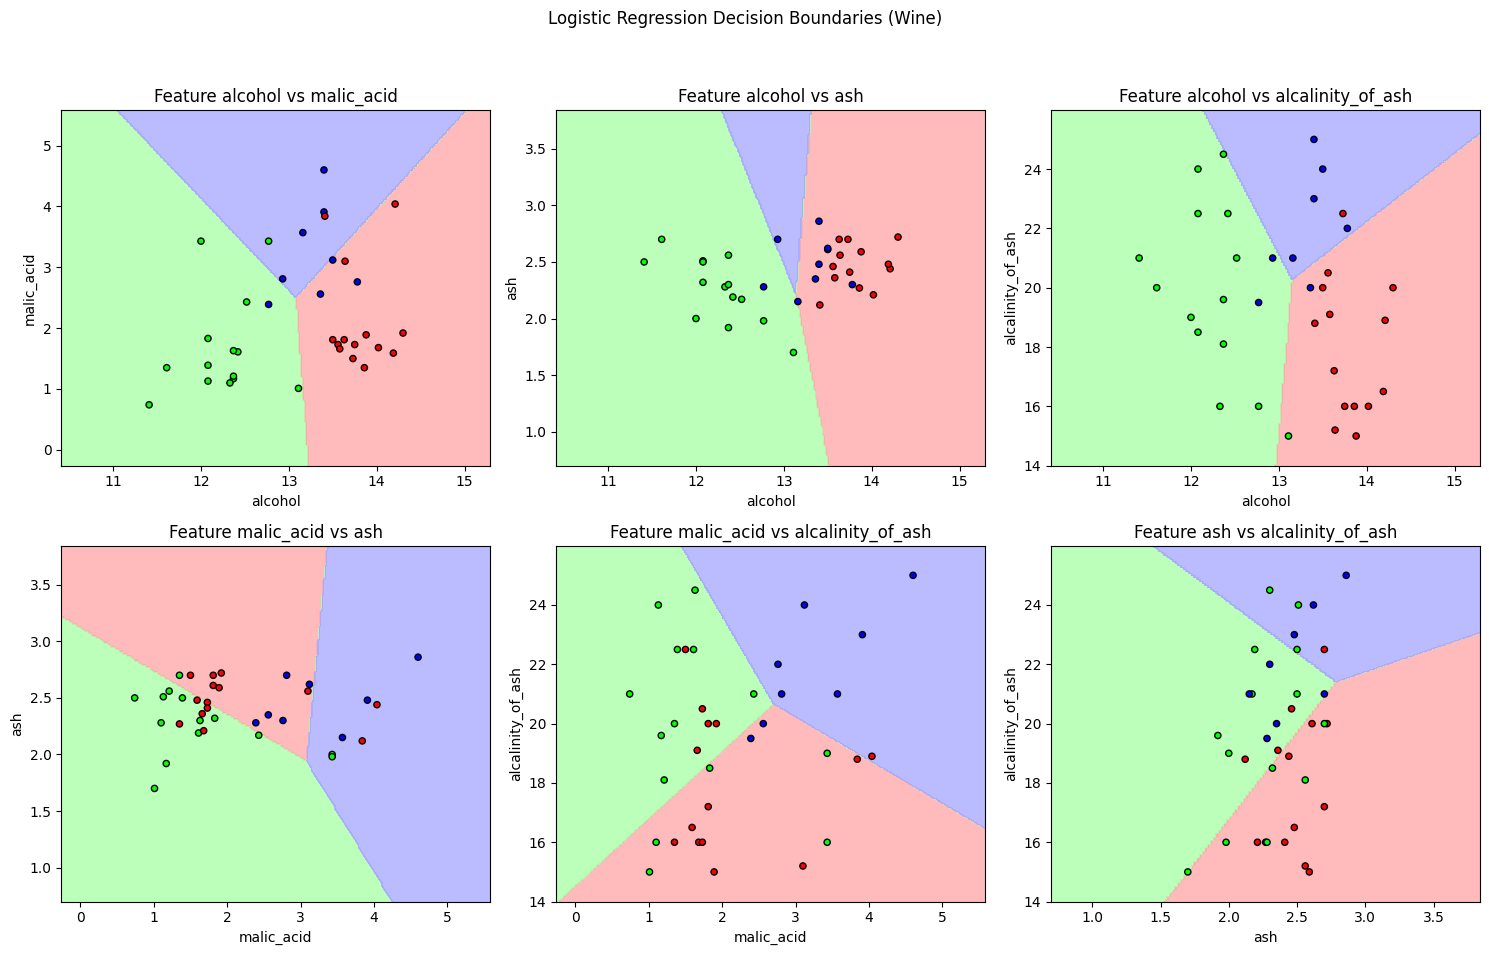

In [ ]:
# Visualize decision boundaries on wine dataset

# Generate some possible feature pairs
feature_pairs = list(itertools.combinations(range(4), 2))
feature_names = df_wine.columns

# Plot decision boundaries
plot_decision_boundaries(X_test, y_test, clf_wine, feature_pairs, 'Logistic Regression Decision Boundaries (Wine)', feature_names)

## Confusion Matrix

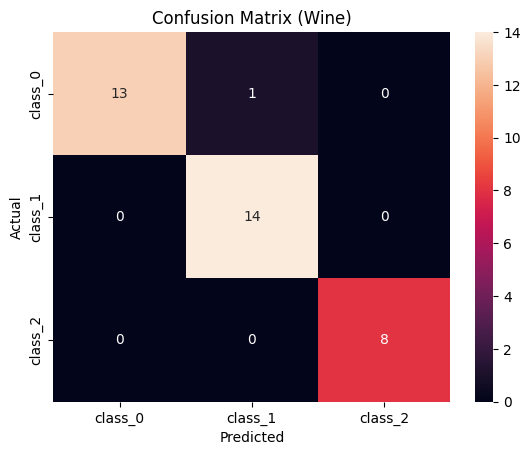

In [ ]:
# Create a confusion matrix using seaborn
# Adjust the confusion matrix for 3 classes

cm_wine = confusion_matrix(y_test, y_pred_wine)

# Create a confusion matrix
heatmap(cm_wine, annot=True, fmt='d', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Wine)')
plt.show()
